In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta

%matplotlib inline

In [2]:
plt.style.use('ggplot')
np.random.seed(123)

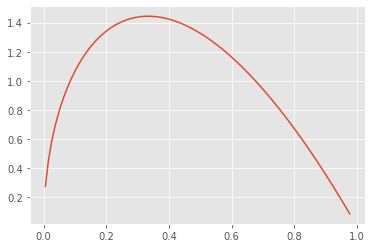

In [3]:
a, b = 1.5, 2.0
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

In [5]:
theta = 0.8
NMCS = 20000
epsilon = 0.5
theta_mcs = [theta]
for _ in range(NMCS):
    theta_new = theta + epsilon * np.random.randn()
    if (beta.pdf(theta_new, a, b) > beta.pdf(theta, a, b)):
        theta = theta_new
    else:
        r = beta.pdf(theta_new, a, b)/ beta.pdf(theta, a, b)
        if (np.random.rand() < r):
            theta = theta_new
        theta_mcs.append(theta)
    df = pd.DataFrame(theta_mcs)

In [6]:
df.head()

,0
0,0.800000
1,0.755857
2,0.755857
3,0.755857
4,0.653757


Text(0, 0.5, '$\\Theta$')

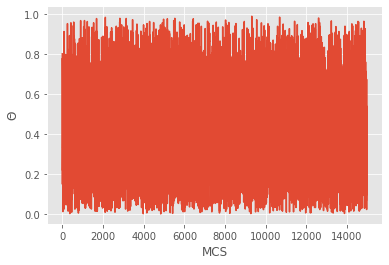

In [7]:
plt.plot(df[0])
plt.xlabel('MCS')
plt.ylabel('$\Theta$')

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


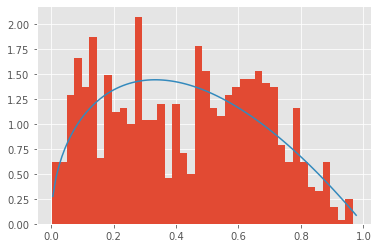

In [10]:
plt.hist(df[0][:1000], normed=True, bins=40)
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


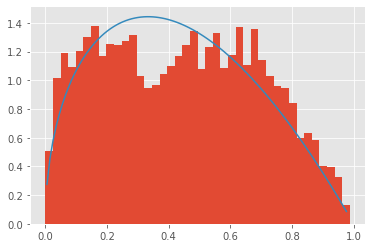

In [11]:
plt.hist(df[0][1000:], normed=True, bins=40)
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))